In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sn

In [7]:
cd = sm.datasets.get_rdataset("CollegeDistance", "AER")
print(cd.data.describe())


# 1st 5 rows of data
cd.data.head()



             score        unemp         wage     distance      tuition  \
count  4739.000000  4739.000000  4739.000000  4739.000000  4739.000000   
mean     50.889029     7.597215     9.500506     1.802870     0.814608   
std       8.701910     2.763581     1.343067     2.297128     0.339504   
min      28.950001     1.400000     6.590000     0.000000     0.257510   
25%      43.924999     5.900000     8.850000     0.400000     0.484990   
50%      51.189999     7.100000     9.680000     1.000000     0.824480   
75%      57.769999     8.900000    10.150000     2.500000     1.127020   
max      72.809998    24.900000    12.960000    20.000000     1.404160   

         education  
count  4739.000000  
mean     13.807765  
std       1.789107  
min      12.000000  
25%      12.000000  
50%      13.000000  
75%      16.000000  
max      18.000000  


,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
1,male,other,39.150002,yes,no,yes,yes,6.2,8.09,0.2,0.88915,12,high,other
2,female,other,48.869999,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
3,male,other,48.740002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
4,male,afam,40.400002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
5,female,other,40.480000,no,no,no,yes,5.6,8.09,0.4,0.88915,13,low,other


In [8]:
print(cd.data['income'].unique())

['high' 'low']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tuition   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     81.25
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.83e-19
Time:                        02:23:41   Log-Likelihood:                -1564.2
No. Observations:                4739   AIC:                             3132.
Df Residuals:                    4737   BIC:                             3145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5568      0.029     19.188      0.000       0.500       0.614
score          0.0051      0.001      9.014      0.000       0.004       0.006
==============================================================================
Omnibus:                      900.061   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.798
Skew:                          -0.163   Prob(JB):                     5.57e-45
Kurtosis:                       2.038   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

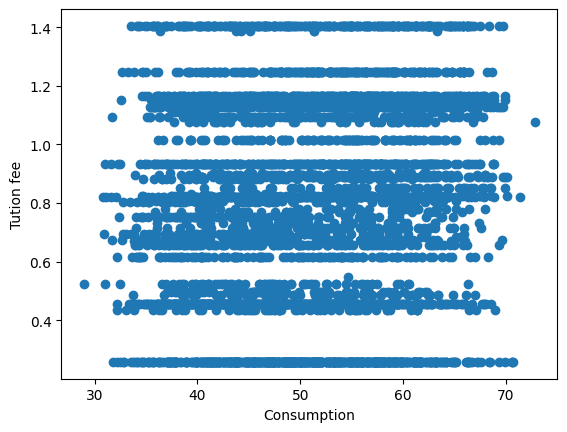

In [9]:
y = cd.data['tuition']
x1 = cd.data['score']
plt.scatter(x1, y)
plt.xlabel('Consumption')
plt.ylabel('Tution fee')

# # Define the intercept to the y line
x = sm.add_constant(x1)

# # OLS Ordinary Least Squares : Estimates the data so a line can 
# # be drawn through data points
results = sm.OLS(y,x).fit()
results.summary()

In [4]:
from sklearn import datasets


Unscaled Correct: 50, Incorrect: 4, Accuracy:  0.93



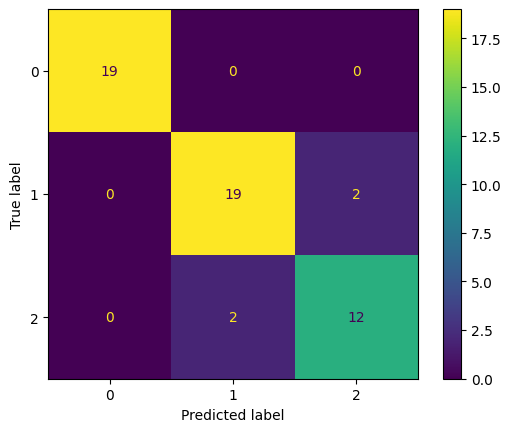

In [16]:
# raw_data = datasets.load_wine()
# raw_data.keys()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from matplotlib import pyplot

features, target = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

unscaledClf=make_pipeline(PCA(n_components=3),GaussianNB())
unscaledClf.fit(X_train, y_train)
pred_test=unscaledClf.predict(X_test)

correct =0
incorrect=0
for pred,gt in zip(pred_test,y_test):
    if pred==gt:
        correct+=1
    else:
        incorrect+=1
print(f"\nUnscaled Correct: {correct}, Incorrect: {incorrect}, Accuracy: {correct/(correct + incorrect): 5.2}\n")
cm = confusion_matrix(y_test, pred_test, labels=unscaledClf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unscaledClf.classes_)
disp.plot()
plt.show()

In [15]:
scaledClf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
scaledClf.fit(X_train, y_train)
pred_test = scaledClf.predict(X_test)

correct =0
incorrect=0
for pred,gt in zip(pred_test,y_test):
    if pred==gt:
        correct+=1
    else:
        incorrect+=1
print(f"PCA Scaled Correct: {correct}, Incorrect: {incorrect}, % Correct: {correct/(correct + incorrect): 5.2}")
# plot_confusion_matrix(unscaledClf,X_test,y_test)
cm = confusion_matrix(y_test, pred_test, labels=unscaledClf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=scaledClf.classes_)
disp.plot()
plt.show()

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2]
